# Titanic Data Analysis

## Import Libaries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [104]:
Data = pd.read_csv('titanic_train.csv')

In [105]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis


## Data Cleaning

In [106]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
Data.shape

(891, 12)

Row = 891, Columns = 12

In [108]:
# Find The Null Values
Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In this dataset available Null Values in Two columns 
    1. Embarked 2
    2. Age 177
    3. Cabin 687
    
I Need To Drop the Cabin column Becouse the have 70% Null value we can't fill the value


In [109]:
# Finding the null value with the help of heatmap

<AxesSubplot:>

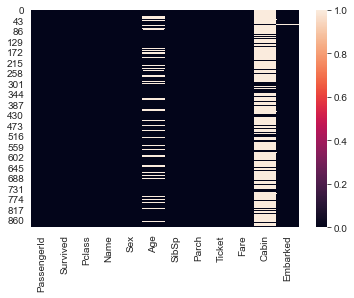

In [110]:
sns.heatmap(Data.isnull())

## Fill The NaN Value 

I am Using the Boxplot for finding the Average Age Value 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

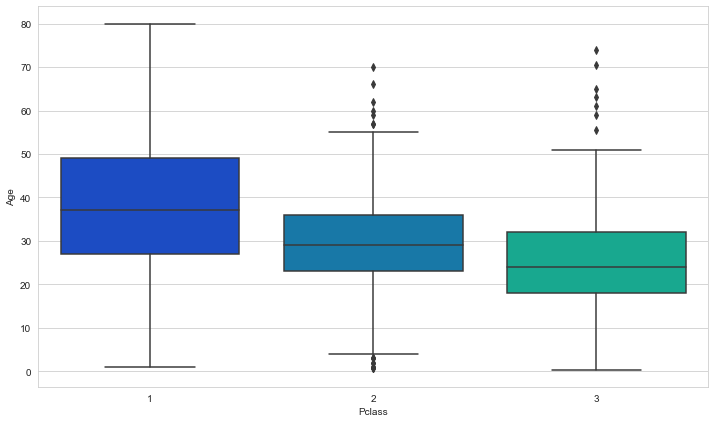

In [111]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=Data,palette='winter')

Average age is different in different classes
    Pclass 1 = 37
    Pclass 2 = 28
    Pclass 3 = 23
Accourding BoxPlot

In [112]:
def Put_Age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 28

        else:
            return 23

    else:
        return Age

### Fill the Age NaN value

In [113]:
Data['Age'] = Data[['Age','Pclass']].apply(Put_Age,axis=1)

In [114]:
Data['Age'].isnull().sum()

0

In [115]:
# Droping the Cabin column
Data.drop('Cabin',axis=1,inplace=True)

In [116]:
Data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [117]:
newdata = Data.dropna()

In [118]:
newdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

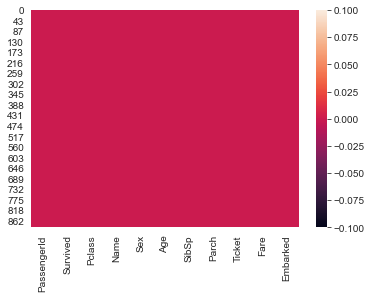

In [119]:
sns.heatmap(newdata.isnull())

#### Data Full Cleaned

## Finding the Relationship between data

<AxesSubplot:xlabel='Survived', ylabel='count'>

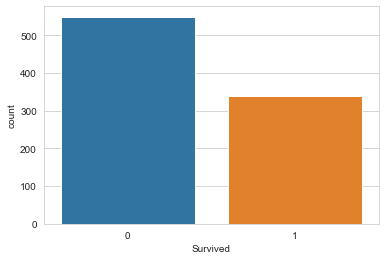

In [120]:
sns.countplot(x='Survived',data=newdata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

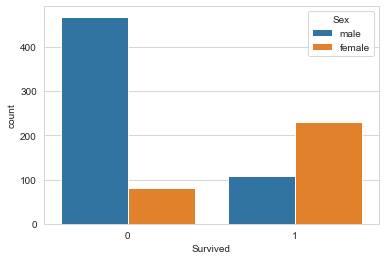

In [121]:
sns.countplot(x='Survived',hue='Sex',data= newdata)

<AxesSubplot:xlabel='Survived', ylabel='count'>

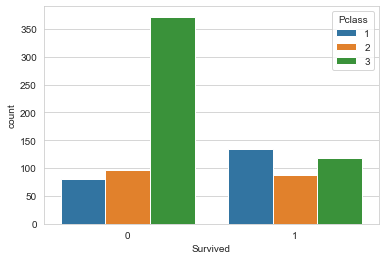

In [122]:
sns.countplot(x='Survived',hue='Pclass',data=newdata)

<AxesSubplot:xlabel='Age'>

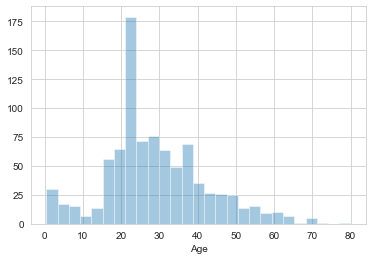

In [123]:
sns.distplot(newdata['Age'],kde=False)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

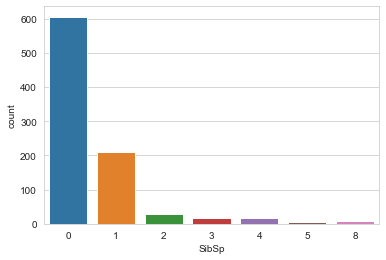

In [124]:
sns.countplot(x='SibSp',data=newdata)

## Preparing the data for Logistic regression

We'll need to convert categorical data to Numerical variables ! Otherwise our machine learning algorithm won't be able to Predication

In [125]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 123.3+ KB


In [126]:
pd.get_dummies(newdata['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [127]:
sex = pd.get_dummies(newdata['Sex'],drop_first=True)
embark = pd.get_dummies(newdata['Embarked'],drop_first=True)

In [128]:
newdata.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [129]:
newdata.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [130]:
DATA = pd.concat([newdata,sex,embark],axis=1)

In [131]:
DATA.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now data is ready to build a Model

# Logistic Regression model


## Train Test Split

In [132]:
DATA.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [133]:
DATA['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
X_train, X_test, y_train, y_test = train_test_split(DATA.drop('Survived',axis=1), 
                                                    DATA['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [138]:
predictions = logmodel.predict(X_test)

In [139]:
from sklearn.metrics import confusion_matrix


In [140]:

accuracy=confusion_matrix(y_test,predictions)

In [141]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8014981273408239

## Evaluation

In [144]:
from sklearn.metrics import classification_report

In [145]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

